In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras
 


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

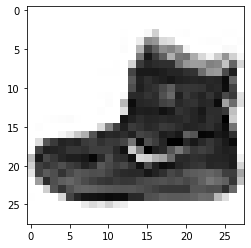

In [5]:
plt.imshow(X_train[0], cmap='Greys')


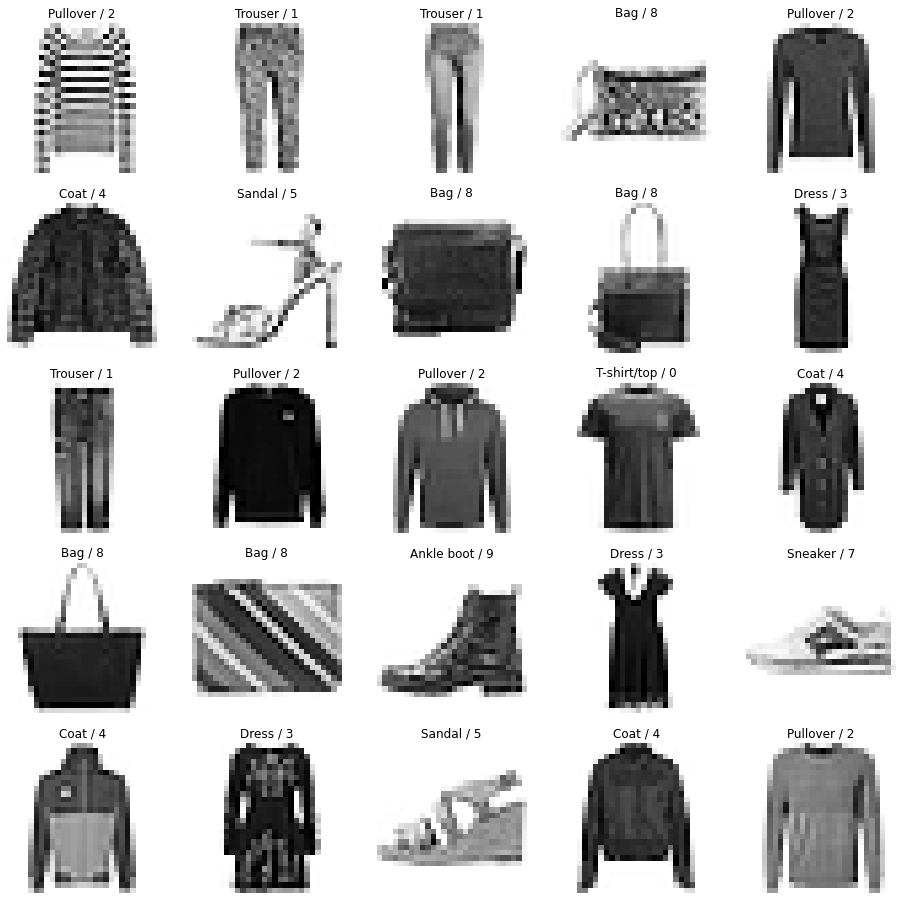

In [6]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
 

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train.ndim

3

In [9]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [10]:
X_train.ndim

4

**Feature selection**


In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)
 

In [13]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

Convolutional Neural **Network**

In [14]:
model = keras.models.Sequential([
                      keras.layers.Conv2D(  filters=32, kernel_size=3, strides = (1,1), padding='valid', activation='relu', input_shape=(28,28,1)),
                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                      keras.layers.Flatten(),
                      keras.layers.Dense(units=128, activation='relu'),
                      keras.layers.Dense(units=10,  activation='softmax')
])

In [15]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


MOdel Compilation


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_data=(X_validation, y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 366us/step - loss: 0.6281 - accuracy: 0.7886 - val_loss: 0.4291 - val_accuracy: 0.8503
Epoch 2/10
48000/48000 [==============================] - 17s 361us/step - loss: 0.3844 - accuracy: 0.8665 - val_loss: 0.3724 - val_accuracy: 0.8718
Epoch 3/10
48000/48000 [==============================] - 17s 361us/step - loss: 0.3350 - accuracy: 0.8826 - val_loss: 0.3474 - val_accuracy: 0.8787
Epoch 4/10
48000/48000 [==============================] - 17s 361us/step - loss: 0.3055 - accuracy: 0.8923 - val_loss: 0.3132 - val_accuracy: 0.8901
Epoch 5/10
48000/48000 [==============================] - 17s 361us/step - loss: 0.2801 - accuracy: 0.9011 - val_loss: 0.3117 - val_accuracy: 0.8902
Epoch 6/10
48000/48000 [==============================] - 17s 360us/step - loss: 0.2690 - accuracy: 0.9039 - val_loss: 0.2934 - val_accuracy: 0.8971
Epoch 7/10
48000/48000 [==============================] 

Test The Model

In [19]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97]],
      dtype=float32)

In [20]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

9

In [21]:
y_test[0]

9

In [22]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.23, 0.02, 0.  ]], dtype=float32)

In [23]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 149us/step


[0.2800755591750145, 0.896399974822998]

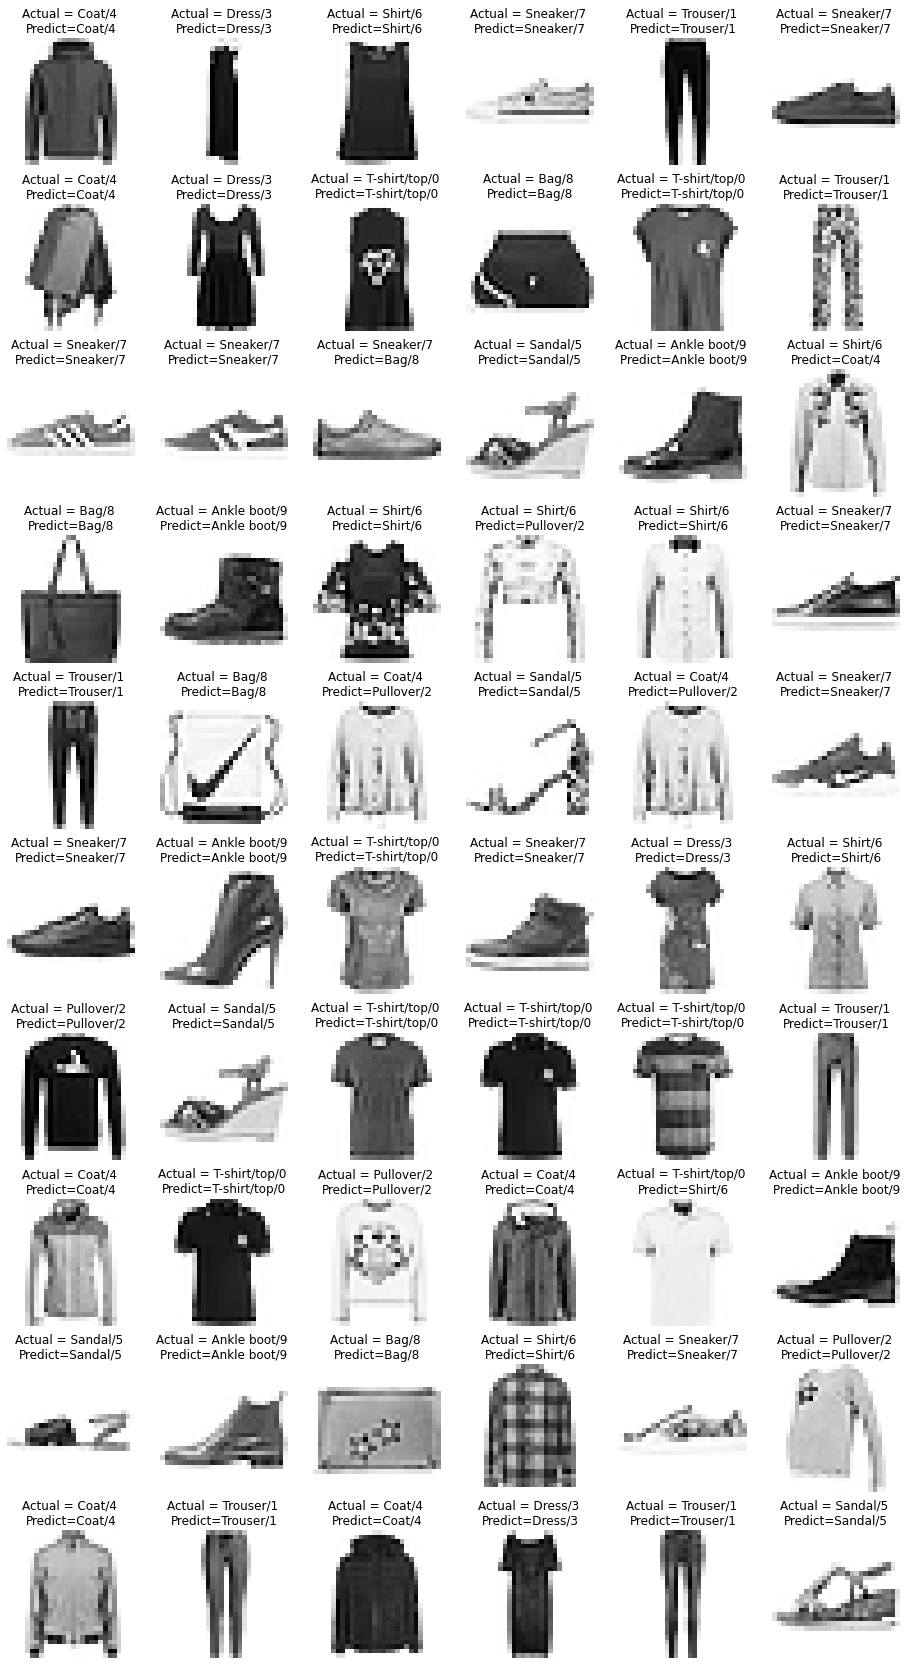

In [28]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap="Greys")
  plt.title('Actual = {}/{} \nPredict={}/{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis("off")

Confusion Metrix

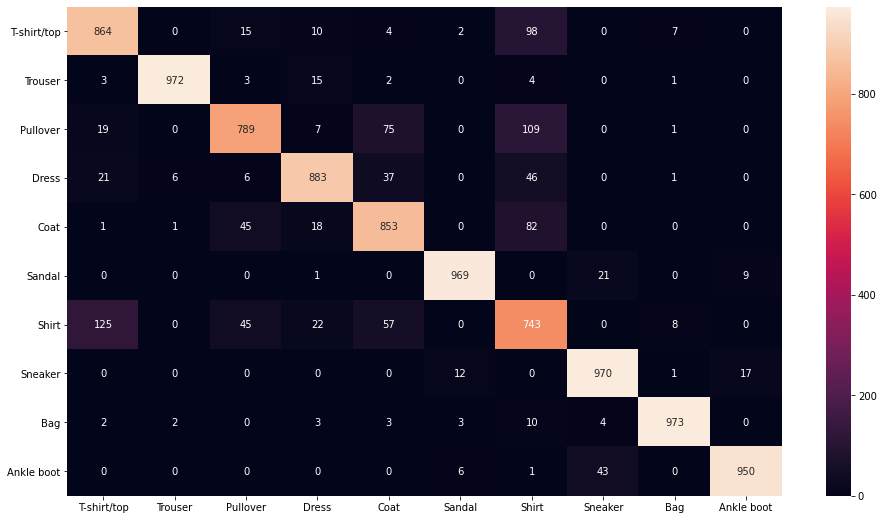

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))

y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [33]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.79      0.83      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.83      0.85      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.68      0.74      0.71      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [34]:
model.save("fashion_cnn.h5")

In [38]:
model_deploy = keras.models.load_model('fashion_cnn.h5')

In [39]:
model_deploy.predict(np.expand_dims(X_test[0], axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97]],
      dtype=float32)

In [40]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0], axis=0)).round(2))

9